In [8]:
# global definitions (Fig 13)

import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import numpy as np

from common_defs import *

from ches_dictionary import ches_dic

data_dir = '/home/foula/linate/plos_asonam_exp_data/france_own/'

#results_dir = 'exp1_results/'
#graph_xlim = (-5, 12)
#graph_ylim = (1, 11)
#gridsize = 200

#results_dir = 'exp2_results/'
#graph_xlim = (-5, 15)
#graph_ylim = (0, 22)
#gridsize = 1000

#results_dir = 'exp3_results/'
#graph_xlim = (-5, 10)
#graph_ylim = (0, 11)
#gridsize = 200
#graph_xlim = (-5, 10) # OLD_exp
#graph_ylim = (-2, 9)

#results_dir = 'exp4_results/'
#graph_xlim = (-5, 16)
#graph_ylim = (-3, 14)
#graph_xlim = (-7, 16) # OLD_exp
#graph_ylim = (-2, 17)
#gridsize = 1000

#results_dir = 'exp5_results/'
#graph_xlim = (-3, 9)
#graph_ylim = (1, 11)
#gridsize = 200

results_dir = 'exp6_results/'
graph_xlim = (-3, 13)
graph_ylim = (0, 20)
gridsize = 1000

#results_dir = 'exp7_results/'
#graph_xlim = (-5, 12)
#graph_ylim = (1, 12)
#gridsize = 200

#results_dir = 'exp8_results/'
#graph_xlim = (-3, 15)
#graph_ylim = (-2, 20)
#gridsize = 1000

dimension_names_to_visualize = ['Left - economy - Right', 'People over elites (salience)']

dimension_names_to_visualize = ['Left - ideology - Right', 'People over elites (salience)']

ches_dic_reverse = {}
for k in ches_dic.keys():
    ches_dic_reverse[ches_dic[k]] = k
                                                                  
dimensions_to_visualize = []
for dn in dimension_names_to_visualize:
    dimensions_to_visualize.append(ches_dic_reverse[dn].replace('ches_', 'ches2019_'))
print(dimensions_to_visualize)      

# FranceOwn
followers_attitudinal_dimensions_file = data_dir + results_dir + 'source_attitudinal_dimensions.csv'
parliamentarians_attitudinal_dimensions_file = data_dir + results_dir + 'target_attitudinal_dimensions.csv'
party_attitudinal_dimensions_file = data_dir + results_dir + 'group_attitudinal_dimensions.csv'
parliamentarians_group_file = data_dir + 'FranceOwn_reference_group.csv'
group_attitudes_file = data_dir + 'FranceOwn_group_attitudes.csv'

group_graph_color_and_location_file = data_dir + 'party_graph_colors_and_location.csv'

country = 'France'
#graph_text_x = -1
#graph_text_y = 1.8
#legend_loc = 'lower left'

['ches2019_lrecon', 'ches2019_antielite_salience']


In [9]:
# load attitudinal dimensions : followers

followers_df = pd.read_csv(followers_attitudinal_dimensions_file)
followers_df.head()

,entity,ches2019_eu_position,ches2019_eu_position_sd,ches2019_eu_salience,ches2019_eu_cohesion,ches2019_eu_foreign,ches2019_eu_intmark,ches2019_eu_budgets,ches2019_eu_asylum,ches2019_lrgen,...,ches2019_civlib_laworder,ches2019_sociallifestyle,ches2019_religious_principles,ches2019_ethnic_minorities,ches2019_nationalism,ches2019_urban_rural,ches2019_protectionism,ches2019_anti_islam_rhetoric,ches2019_antielite_salience,ches2019_members_vs_leadership
0,0,5.985094,0.896431,8.149731,8.095408,3.844285,5.454480,3.102934,3.514843,7.196689,...,8.970199,3.899926,4.493643,5.138989,6.528779,1.559395,3.660746,8.120432,5.016704,11.137185
1,1,1.508634,0.826603,13.345798,11.515593,4.068122,-0.875456,-5.969320,0.144928,5.144649,...,13.610792,-5.300163,2.282064,-0.391503,9.937864,-11.793179,8.486155,14.941920,14.531933,26.325759
2,2,3.716462,1.007215,5.254502,2.475357,2.046674,3.475019,3.017158,3.528227,1.546109,...,0.075668,3.093060,0.579036,3.658062,2.041914,5.196428,7.275583,-0.520937,7.086855,3.502836
3,3,6.063407,0.688845,11.987877,11.412894,5.256997,4.619301,0.971923,3.731404,6.440350,...,11.342604,-1.858474,3.561364,0.953431,6.296379,-5.600880,3.553145,9.827608,8.405381,18.722431
4,4,6.893216,0.559152,7.252375,5.981920,3.662653,6.938628,5.287362,4.520841,6.937413,...,5.964881,4.961833,4.179604,5.751944,4.615863,4.697952,2.559774,3.419567,3.449628,7.179259


In [10]:
# load latent dimensions : parliamentarians

parliamentarians_df = pd.read_csv(parliamentarians_attitudinal_dimensions_file)
parliamentarians_df.head()

# and parliamentarians group info
parliamentarians_group_df = pd.read_csv(parliamentarians_group_file)
parliamentarians_group_df.head()

# and merge it with latent_dimensions_info
print(parliamentarians_df.shape)
parliamentarians_df = pd.merge(parliamentarians_df, parliamentarians_group_df, left_on = 'entity', 
                               right_on = 'i', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# also identify parliamentarians' party names, and keep the ones which have attirudinal information
group_names_df = pd.read_csv(group_attitudes_file)
ches_cols = []
for c in group_names_df.columns:
    if c.startswith('ches'):
        ches_cols.append(c)
group_names_df.dropna(subset = ches_cols, inplace = True)
group_names_df = group_names_df[['k', 'party']]
group_names_df.head()
#
parliamentarians_df = pd.merge(parliamentarians_df, group_names_df, on = 'k', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

# finally add color information for the graph
colors_and_location_df = pd.read_csv(group_graph_color_and_location_file)
parliamentarians_df = pd.merge(parliamentarians_df, colors_and_location_df, on = 'party', how = 'inner')
print(parliamentarians_df.shape)
parliamentarians_df.head()

(691, 34)
(691, 36)
(381, 37)
(381, 44)


,entity,ches2019_eu_position,ches2019_eu_position_sd,ches2019_eu_salience,ches2019_eu_cohesion,ches2019_eu_foreign,ches2019_eu_intmark,ches2019_eu_budgets,ches2019_eu_asylum,ches2019_lrgen,...,i,k,party,color,dim_x,dim_y,dim_ax,dim_ay,dim_ax_1,dim_ay_1
0,81,6.115537,0.740838,7.054736,7.048260,5.165750,4.211080,2.349937,4.869075,1.741341,...,81,1,EELV,blue,-0.1,0.2,0.1,0.1,-1.5,0.1
1,83,4.363179,0.990418,8.012241,6.271571,3.784056,3.138228,1.747337,3.976079,2.213936,...,83,1,EELV,blue,-0.1,0.2,0.1,0.1,-1.5,0.1
2,84,5.853451,0.802420,6.058215,4.898523,4.192207,5.013526,4.647442,5.602836,2.440500,...,84,1,EELV,blue,-0.1,0.2,0.1,0.1,-1.5,0.1
3,85,6.814646,0.724076,6.262984,5.740659,5.099330,5.335465,4.571631,5.847818,2.209224,...,85,1,EELV,blue,-0.1,0.2,0.1,0.1,-1.5,0.1
4,86,7.198075,0.626759,6.315820,4.622171,4.699684,6.293307,6.103203,6.180504,3.233874,...,86,1,EELV,blue,-0.1,0.2,0.1,0.1,-1.5,0.1


In [11]:
group_size_df = (parliamentarians_df.groupby(['party']).size()).to_frame().reset_index()

group_size_df.head(20)

,party,0
0,EELV,7
1,LFI,15
2,LR,182
3,MoDem,39
4,PCF,28
5,PS,102
6,RN,8


In [12]:
group_names_df.head(20)

,k,party
1,1,EELV
2,2,LFI
3,3,LR
5,5,MoDem
6,6,PCF
8,8,PS
9,9,RN


In [13]:
# also load/compute dimensions of parties (as the mean point of parliamentarias in the party)

#group_dimensions_df = parliamentarians_df.groupby('party')[dimensions_to_visualize].mean()
#group_dimensions_df = group_dimensions_df.reset_index()
#print(group_dimensions_df.shape)
#group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
#print(group_dimensions_df.shape)
#group_dimensions_df.head(20)

group_dimensions_df = pd.read_csv(party_attitudinal_dimensions_file)
group_dimensions_df = group_dimensions_df[['entity'] + dimensions_to_visualize]
#group_dimensions_df['entity'] = group_dimensions_df['entity'].astype(str)
print(group_dimensions_df.shape)
group_dimensions_df = pd.merge(group_dimensions_df, group_names_df, left_on = 'entity',
                               right_on = 'k', how = 'inner')
group_dimensions_df.drop(columns = ['entity', 'k'], inplace = True)
group_dimensions_df = pd.merge(group_dimensions_df, colors_and_location_df, on = 'party', how = 'inner')
print(group_dimensions_df.shape)
group_dimensions_df.head(20)

(10, 3)
(7, 10)


,ches2019_lrecon,ches2019_antielite_salience,party,color,dim_x,dim_y,dim_ax,dim_ay,dim_ax_1,dim_ay_1
0,2.875,4.285714,EELV,blue,-0.1,0.2,0.1,0.1,-1.5,0.1
1,0.875,9.571428,LFI,green,-0.1,-0.3,0.1,0.1,0.1,0.1
2,8.125,3.714286,LR,#8968CD,0.2,0.0,0.1,0.1,0.1,0.1
3,6.250,3.666667,MoDem,red,-0.1,0.2,0.1,0.1,-1.0,0.2
4,1.125,6.857143,PCF,yellow,-0.1,0.2,0.1,0.1,-1.0,-0.5
5,3.125,3.857143,PS,#CD6090,-0.2,-0.3,0.1,0.1,-1.0,-0.4
6,6.875,9.428572,RN,magenta,0.2,0.0,0.1,0.1,0.1,0.1


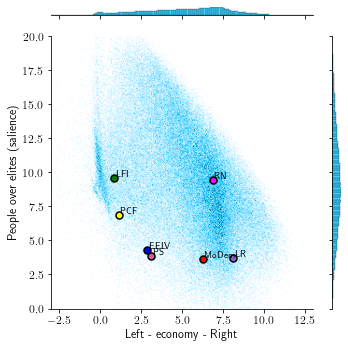

In [14]:
# visualization of two dimensions

xdim = dimensions_to_visualize[0]
ydim = dimensions_to_visualize[1]

color_dim = 'color'

ren = {xdim: 'x', ydim: 'y'}

disp = {}
for _, row in colors_and_location_df.iterrows():
    disp[row['party']] = (float(row['dim_ax']), float(row['dim_ay']))
    
df = followers_df.rename(columns = ren).drop_duplicates(subset = ['x', 'y'])
#df = df[~df.index.duplicated()]

# use the followers + parliamentarians
g = sn.jointplot(x = 'x', y = 'y', data = df, space = 0, color = "deepskyblue", 
                 kind = 'hex', ratio = 10, height = 5, xlim = graph_xlim, ylim = graph_ylim, #) ,
                 joint_kws = dict(gridsize = gridsize)) 

#for _, row in parliamentarians_df.iterrows(): # TODO
#    g.ax_joint.plot(row[xdim] , row[ydim], '+', color = row[color_dim], mew = 1.0, ms = 7)

for _, row in group_dimensions_df.iterrows():
    g.ax_joint.plot(row[xdim], row[ydim], 'o', color = row[color_dim], mew = 1.5, ms = 7, mec = 'k')
    
    txt = g.ax_joint.text(row[xdim] + disp[row['party']][0],
                          row[ydim] + disp[row['party']][1], row.party, 
                          color = 'black', fontsize = 9)
                          #bbox = dict(boxstyle = "round", ec = 'black', fc = row[color_dim], alpha = 1),
                          
g.ax_joint.set_xlabel(dimension_names_to_visualize[0])
g.ax_joint.set_ylabel(dimension_names_to_visualize[1])

#txt = g.ax_joint.text(graph_text_x, graph_text_y, country, fontsize = 14)
#plt.legend(handles = ideo_legend_small, loc = legend_loc, fontsize = bidimensional_legend_fs)

plt.tight_layout()

plt.show()

#plt.savefig('Figures/AttitudinalSpace/ARF_lrgen_enviroment_bio_nucleaire.pdf')
#plt.clf()
#plt.close()